# Projet Numérique : Equations Différentielles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, pi, sin, cos, exp

## Question 1

Le terme $\alpha x_1 > 0$ dans $\dot x_1$ représente la capacité de reproduction des proies, tandis que le terme $-\beta x_1 x_2 < 0$ représente la prédation des prédateurs. Ainsi, si la prédation est plus forte que la reproduction à un instant donné, la population de proie diminue.    
Dans l'expression de $\dot x_2$, $-\gamma x_2 < 0$ modélise la compétition entre prédateurs, alors que le terme $\delta x_1 x_2 > 0$ représente la capacité des prédateurs à se nourrir. 

-------

Il est clair que $(0,0)$ est un point d'équilibre du système. Intuitivement, ce point d'équilibre est instable puisqu'il représente la situation où les espèces ne sont pas encore apparues (ou ont disparu), et rien n'empêche leur (ré)apparition.    
Pour trouver le deuxième point d'équilibre, raisonnons par analyse-synthèse.    
*Analyse :*

Supposons l'existence d'un point d'équilibre $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.
Alors $\begin{cases}
0 = \overline{x}_1 (\alpha - \beta \, \overline{x}_2)\\
0 = \overline{x}_2 (\gamma - \delta \, \overline{x}_1) 
\end{cases}$   
Or, $\overline{x}_1$ et $\overline{x}_2$ sont tous deux non nuls donc on déduit immédiatement les solutions suivantes :
$$
\begin{cases}
\overline{x}_1 = \frac {\gamma} {\delta} \\
\overline{x}_2 = \frac {\alpha} {\beta }
\end{cases}
$$   
   
*Synthèse :*   
   
Supposons $\overline{x}$ défini comme ci-dessus. Alors $\overline{x}$ est bien un point d'équilibre du système, et les quatres coefficients étant positifs, on a également $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.    
   
Intuitivement, ce point d'équilibre est stable puisqu'en l'absence d'action extérieure, de telles populations de proies-prédateurs existent naturellement.

### Stabilité

On pose
$f:\begin{array}{l|rcl}
\mathbb{R} \times (\mathbb{R}_{>0})^2 \to \mathbb{R}^2 \\
(t,x) \mapsto (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))
\end{array}$   
   
Soit $t,x \in \mathbb{R} \times (\mathbb{R}_{>0})^2$, alors
$$
\partial_x f (t,x) = 
\begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}
$$


$J_f(t, 0) = \begin{pmatrix}
\alpha & 0 \\
0 & -\gamma
\end{pmatrix}$   Une des valeurs $J_f(t, 0)$ est strictement positive, donc O est une position d'équilibre instable.

De même, on a $J_f(\bar{x}) = \begin{pmatrix} 0 & - \frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 \end{pmatrix}. $ Ses valeurs propres sont $ \pm i \sqrt{\alpha \gamma} ,$ on ne peut pas conclure.

## Question 2

Pour cette question et les suivantes, on prend tous les coefficients égaux à $1$. Les deux points d'équilibre sont donc $(0,0)$ et $(1,1)$.

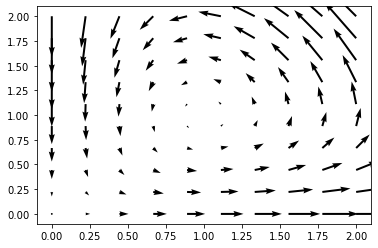

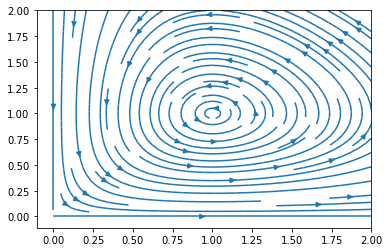

In [2]:
def pp(x, y):
    return x * (1 - y), - y * (1 - x)

x, y = np.meshgrid(np.linspace(0,2,10), np.linspace(0,2,10))
z = pp(x, y)

plt.quiver(x, y, *z)
plt.show();
plt.streamplot(x, y, *z)
plt.show();

## Question 3

Soit $t,x \in \mathbb{R} \times (\mathbb{R}_{>0})^2$, alors
$$
\partial_x f (t,x) = 
\begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}
$$    
   
Cette fonction existe et est continue par rapport à $t$ et à $x$, donc le théorème de Cauchy-Lipschitz s'applique. On en déduit donc que pour des conditions initiales données $t_0$ et $x_0$, il existe une unique solution maximale.

Supposons par l'absurde qu'il existe $t_1 \in \mathbb{R}$ tel que $x_1(t_1) = 0$   

Alors $\forall t \gt t_1, x(t)=(0,x_{2}(t_1) e^{-\gamma (t-t_1)})$ est une solution. Par unicité, c'est l'unique solution. On en conclut que $\forall t \in \mathbb{R}$,$x_1(t) = 0$, ce qui est absurde car $x_0 \in 

## Question 4

Soit $t \in \mathbb{R}, \ \partial_t H(x_1(t), x_2(t)) = \delta \dot x_1 - \gamma \frac {\dot x_1} {x_1} + \beta \dot x_2 - \alpha \frac {\dot x_2} {x_2}$.       
Donc $\partial_t H(x_1(t), x_2(t)) = \delta x_1(\alpha - \beta x_2) - \gamma (\alpha - \beta  x_2) - \beta x_2(\gamma -\delta x_1) + \alpha (\gamma - \delta x_1)$.        
On trouve que $\forall t \in \mathbb{R}, \ \partial_t H(x_1(t),x_2(t)) = 0$, ce qui signifie que les solutions initialisées dans $(\mathbb{R}_{>0})^2$ restent sur les courbes de niveau de $H$.     
Si les solutions maximales initialisées dans $(\mathbb{R}_{>0})^2$ n'étaient pas définies sur $\mathbb{R}$, cela signifirait qu'elles "explosent" en temps fini ou infini d'après le théorème du domaine maximal d'existence, ce qui est impossible puisqu'elles restent sur une courbe de niveau de $H$. Par conséquent, une solution maximale initialisée dans $(\mathbb{R}_{>0})^2$ est définie sur $\mathbb{R}$ tout entier.

## Question 5

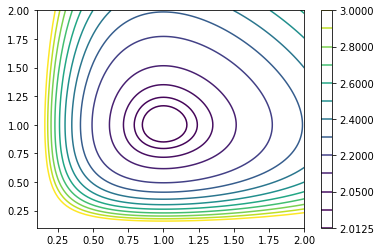

In [3]:
def H(x, y):
    return x - log(x) + y - log(y)

vectorized_H = np.vectorize(H)

x, y = np.meshgrid(np.linspace(0.1,2,100), np.linspace(0.1,2,100))
z = vectorized_H(x, y)

plt.contour(x, y, z, [2.0125, 2.025, 2.05, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.])
plt.colorbar()
plt.show();

Ces courbes de niveau laissent penser que $\overline{x}$ est un minimum de $H$. On peut d'ailleurs confirmer par le calcul que c'est son minimum global.    
Vu les courbes de niveau tracées, on peut en conclure que les solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ tournent autour de $\overline{x}$, sur les courbes de niveau de $H$ qui sont fermées (car $H$ est continue). Graphiquement, on en déduit également que $\overline{x}$ est un point d'équilibre stable puisqu'une solution initialisée à ce point va rester sur la courbe de niveau réduite à un point $H(\overline{x})$.

## Question 6

In [4]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    for k in range(int((tf-t0)/dt)):
        t.append(t[k] + dt)
        x.append(x[k] + dt * f(t[k], x[k]))
    if t[-1] != tf:
        t.append(tf)
        x.append(x[-1] + dt * f(t[-1], x[-1]))
    return t, x

In [37]:
def f_test(t, x):
    return 2*x + sin(t)

def sol(t):
    return 1/5 * (exp(2*t) - 2*sin(t) - cos(t))

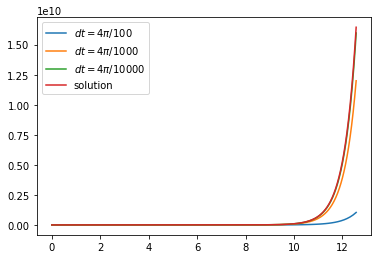

In [61]:
T_e, X_e = solve_euler_explicit(f, 0, 4*pi/100, 0, 4*pi)
T_e1, X_e1 = solve_euler_explicit(f, 0, 4*pi/1000, 0, 4*pi)
T_e2, X_e2 = solve_euler_explicit(f, 0, 4*pi/10000, 0, 4*pi)
T_r2 = np.linspace(0, 4*pi, 10000)
X_r2 = np.vectorize(sol)(T_r2)


plt.plot(T_e, X_e, label='$dt = 4 \pi / 100}$')
plt.plot(T_e1, X_e1, label='$dt = 4 \pi / 1000}$')
plt.plot(T_e2, X_e2, label='$dt = 4 \pi / 10000}$')
plt.plot(T_r2, X_r2, label='solution')
plt.legend();

On observe bien une convergence du schéma quand $dt \rightarrow 0$.

## Question 7

In [20]:
a, b, c, d = 3, 1, 2, 1

def lotka_volterra(t, x):
    return np.array([x[0] * (a - b * x[1]), -x[1] * (c - d * x[0])])

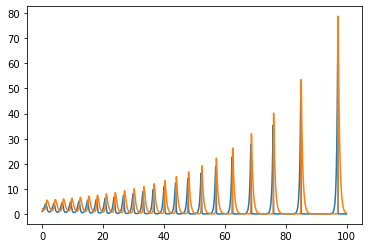

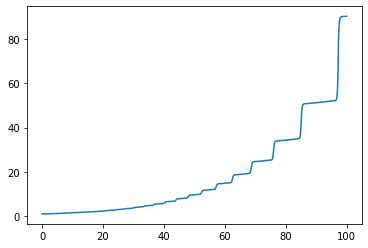

In [31]:
T_elv, X_elv = solve_euler_explicit(lotka_volterra, [1, 2], 1/100, 0, 100)

x1 = [x[0] for x in X_elv]
x2 = [x[1] for x in X_elv]

plt.plot(T_elv, x1, label = 'Nombre de proies')
plt.plot(T_elv, x2, label = 'Nombre de prédateurs')
plt.show()

def H(x1, x2):
    return d * x1 - c * log(x1) + b * x2 - a * log(x2)

H_elv = [H(x[0], x[1]) for x in X_elv]

plt.plot(T_elv, H_elv)
plt.show()

Les solutions enchaînent des maximum locaux qui tendent vers l'infini quand t devient très grand.     
On voit que l'évolution temporelle ne se fait pas à H constant, ce qui indique que l'évolution obtenue avec solve_euler_explicit n'est pas fidèle à la réalité.

## Question 8

In [76]:
from scipy.optimize import newton

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    for i in range(int((tf-t0)/dt)):
        t.append(t[-1] + dt)
        next_x = newton(lambda y: y - x[-1] - dt * f(t[-1], y), x[-1], maxiter = itermax)
        x.append(next_x)
    return t, x

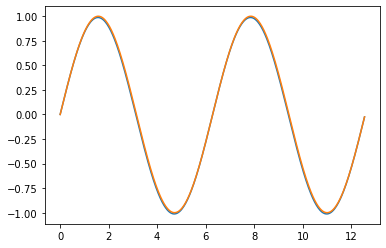

In [95]:
def f_test2(t, x):
    return cos(t)

def sol2(t):
    return sin(t)

T, X = solve_euler_implicit(f_test2, 0, 4*pi/500, 0, 4*pi)
X_sol = np.vectorize(sol2)(T)

plt.plot(T, X)
plt.plot(T, X_sol)
plt.show()

On voit que solve_euler_implicit fonctionne correctement.

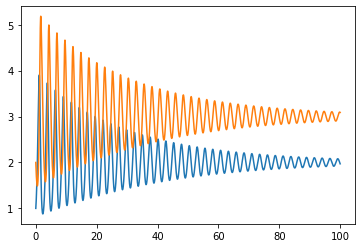

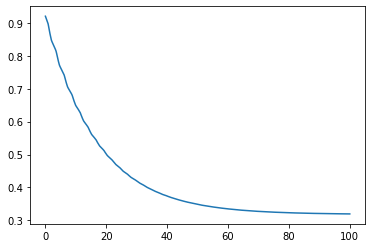

In [98]:
T, X = solve_euler_implicit(lotka_volterra, [1, 2], 1/100, 0, 100)

x1 = [x[0] for x in X]
x2 = [x[1] for x in X]

plt.plot(T, x1)
plt.plot(T, x2)
plt.show()

H_elv = [H(x[0], x[1]) for x in X]

plt.plot(T, H_elv)
plt.show()

Les solutions obtenues ne conviennent toujours pas, H n'est pas constant et décroît.

## Question 9

- Soit $x$ une solution du premier système, on a vu que, dans ce cas-là, H est constant au cours du temps, ainsi si $H(x(0)) = H_0$ alors pour tout $t \in \mathbb{R}$ on a $H(x(t)) = H_0$ et les nouveaux termes sont nuls tout le temps.     

- Soit maintenant $x_0 \in \mathbb{R}_{>0}^2$, soit $x$ la solution maximale du premier système, initialisée en $(0, x_0)$ et $y$ la solution maximale du nouveau système initialisée en $(0, x_0)$.
On sait qu'un tel y existe car u est continûment différentiable et donc la fonction g telle qu'on a désormais $\dot x = g(t, x)$ est continûment différentiable et le théorème de Cauchy_Lipschitz s'applique, assurant l'unicité de la solution maximale. Or on a vu que $x$ est également solution du second système, donc par unicité, $y = x$.    

Toute solution du nouveau système est donc solution de Lotka-Volterra



## Question 10

H est dérivable par rapport à t, on a:    
$\frac{d(H(x_1, x_2) - H_0)}{dt} = -u_1(x_1, x_2)(H(x_1, x_2) - H_0)(\delta - \frac{\gamma}{x_1}) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)(\beta - \frac{\alpha}{x2})$    

En calculant le gradient de H, il vient que $\left \| \bigtriangledown H(x(t)) \right \|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$

Ainsi, en choisissant $u_1(x_1, x_2) = k(\delta - \frac{\gamma}{x_1})$ et $u_2(x_1, x_2) = k(\beta - \frac{\alpha}{x_2})$ on obtient bien l'égalité voulue.     

Par hypothèse, s'il existe $c'$ tel que $\left \| x - \bar{x} \right \| = (\frac{x_1}{\gamma })^2(\delta - \frac{\gamma }{x_1})^2 + (\frac{x_2}{\beta })^2(\beta - \frac{\alpha }{x_2})^2 \geq c'> 0$ alors, par stricte positivité de $x_1$ et $x_2$, et à la vue de l'écriture de $\left \| \bigtriangledown H(x(t)) \right \|$, on a l'existence d'un c tel que $\left \| \bigtriangledown H(x(t)) \right \|^2 \geq c > 0$    

Comme $\frac{d(H(x_1, x_2) - H_0)}{dt} = -k\left \| \bigtriangledown H(x(t)) \right \|^2(H(x_1, x_2) - H_0)$ alors $(H(x_1, x_2) - H_0)(t) = (H(x_1, x_2) - H_0)_0 \textrm{exp}(\int_{t_0}^{t} -k\left \| \bigtriangledown H(x(s)) \right \|^2ds)$     

Ainsi, puisque entre $t_0$ et $t$, $-k\left \| \bigtriangledown H(x(t)) \right \|^2 \leq -kc^2$, alors $\left | (H(x_1, x_2) - H_0)(t) \right | \leq \left | C_0 \right |e^{-kc^2(t-t_0)}$

## Question 11

On peut améliorer l'implémentation du schéma d'Euler en utilisant les équations de la question 9 avec la fonction $u$ déterminée à la question 10, en appliquant Euler à $g=f-k. \nabla H.(H(x)-H_0)$ On aura alors un meilleur comportement des solutions et on pourra alors stabiliser $H$ qui convergera exponentiellement vers $H_0$     
Le rôle de k est de contrôler la vitesse avec laquelle $H$ converge vers $H_0$.     

On est néanmoins limiter dans les valeurs que l'on peut donner à k: on a $H(x^{j+1}) - H(x_0) = (H(x^j) - H(x_0))(1-k.dt\|\nabla H(x(t))\|^2)$ ainsi, si on fixe $dt$, augmenter k pourrait signifier que H n'est plus constant.